In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn import metrics
from zipfile import ZipFile, Path
import requests, zipfile, io


In [2]:
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip", stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
df = z.open("bank-full.csv")
data = pd.read_csv("bank-full.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [2]:
#pwd

'C:\\Users\\Welcome\\Downloads'

In [3]:
#data = pd.read_csv(r'C:\Users\Welcome\Downloads\ALY6140\Santhi Capstone project\bank-full.csv',sep=';')


In [4]:
"""pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()
"""

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
def col_types(df):
    """
    The function takes the dataframe as input
    and returns the numeric and non numeric columns seperately
    """
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    print(f'There are total {len(cat_cols)} Categorical variables:{(cat_cols)} ')
    print(f'There are total {len(num_cols)} Numeric variables:{(num_cols)} ')

col_types(data)

There are total 10 Categorical variables:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y'] 
There are total 7 Numeric variables:['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 


In [6]:
data.duration.isna().sum()

0

In [12]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [94]:

data.describe().astype('int64')

,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


In [7]:
categorical = data.select_dtypes(include=['object']).columns.values

for col in categorical:
    print(col, "(", len(data[col].unique()) , "values):\n", np.sort(data[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


In [12]:
num_cols = data.select_dtypes(include=['float64', 'int64','int32'])
num_cols.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [6]:
cat_cols = data.select_dtypes(include = ["object"])
for i in cat_cols:
    print(len(data[i].unique()))
    print(data[i].unique())

12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
3
['married' 'single' 'divorced']
4
['tertiary' 'secondary' 'unknown' 'primary']
2
['no' 'yes']
2
['yes' 'no']
2
['no' 'yes']
3
['unknown' 'cellular' 'telephone']
12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
4
['unknown' 'failure' 'other' 'success']
2
['no' 'yes']


                job  Percentage
blue-collar    9732   21.525735
management     9458   20.919688
technician     7597   16.803433
admin.         5171   11.437482
services       4154    9.188029
retired        2264    5.007631
self-employed  1579    3.492513
entrepreneur   1487    3.289023
unemployed     1303    2.882042
housemaid      1240    2.742695
student         938    2.074716
unknown         288    0.637013


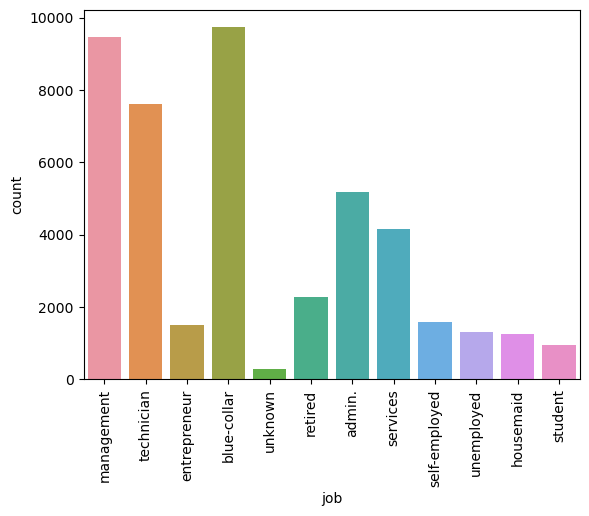

          marital  Percentage
married     27214   60.193316
single      12790   28.289576
divorced     5207   11.517109


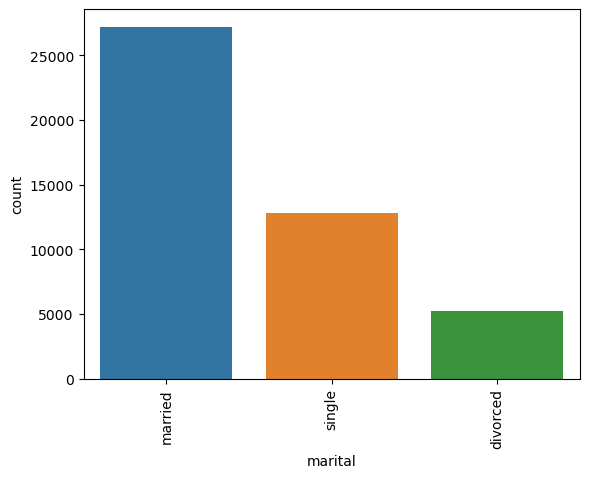

           education  Percentage
secondary      23202   51.319369
tertiary       13301   29.419831
primary         6851   15.153392
unknown         1857    4.107407


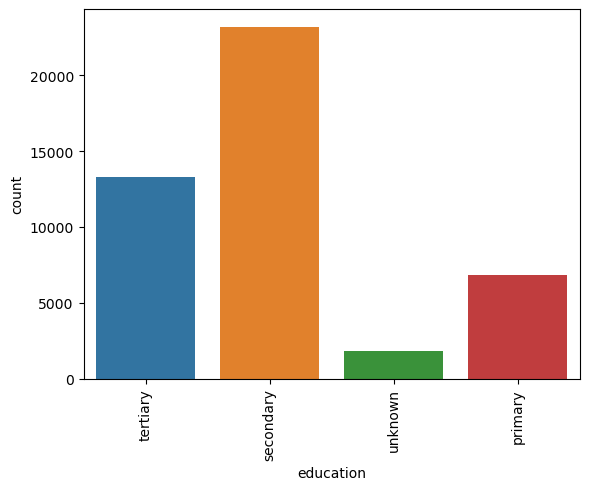

     default  Percentage
no     44396   98.197341
yes      815    1.802659


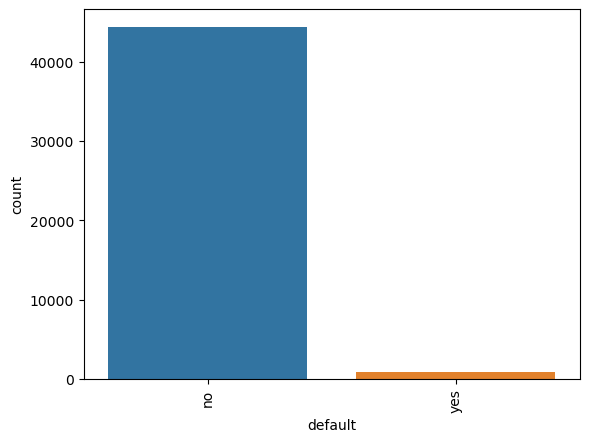

     housing  Percentage
yes    25130   55.583818
no     20081   44.416182


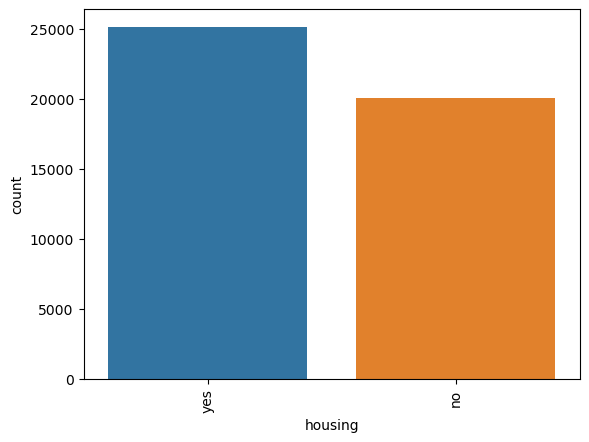

      loan  Percentage
no   37967   83.977351
yes   7244   16.022649


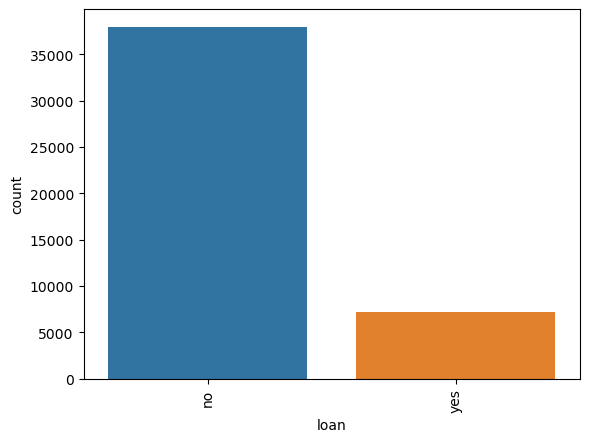

           contact  Percentage
cellular     29285   64.774059
unknown      13020   28.798301
telephone     2906    6.427639


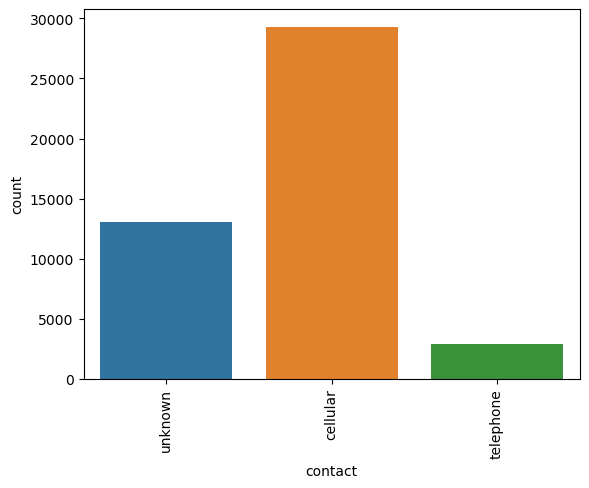

     month  Percentage
may  13766   30.448342
jul   6895   15.250713
aug   6247   13.817434
jun   5341   11.813497
nov   3970    8.781049
apr   2932    6.485147
feb   2649    5.859194
jan   1403    3.103227
oct    738    1.632346
sep    579    1.280662
mar    477    1.055053
dec    214    0.473336


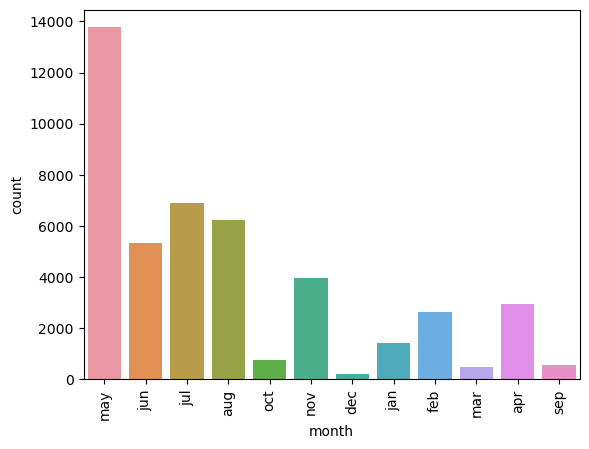

         poutcome  Percentage
unknown     36959   81.747805
failure      4901   10.840282
other        1840    4.069806
success      1511    3.342107


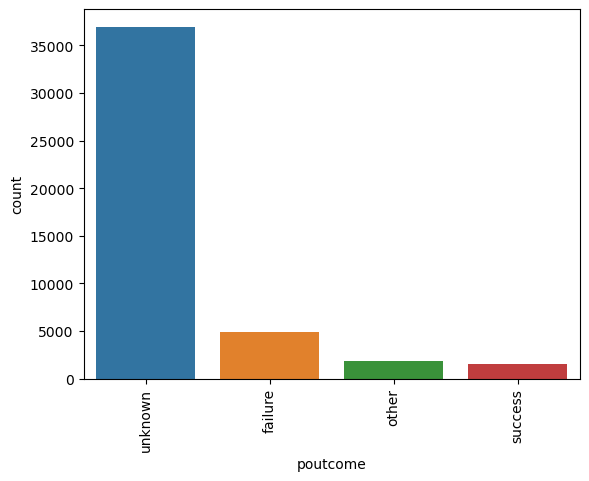

         y  Percentage
no   39922    88.30152
yes   5289    11.69848


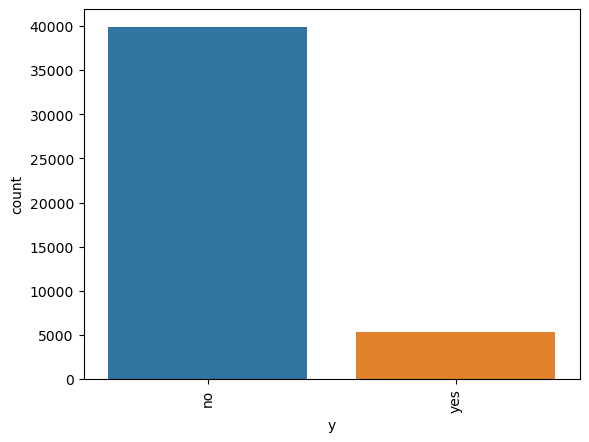

In [7]:
def cat_smry(df, col_name, plot=False):
    """
    The function takes the dataset as input
    seperates the categorical variables and
    returs the count of different types of each categorical variable
    and the percentage of each type under the categorical varibale
    
    It gives the count plot wich sows the percentage of each categorical variable
    """
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                         "Percentage": 100 * df[col_name].value_counts() / len(df)}))
    
    if plot:
        sns.countplot(x=df[col_name], data=df)
        plt.xticks(rotation=90)
        plt.show(block=True)
           
for col in cat_cols:
    cat_smry(data, col, True)
                

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
5%          27.000000
10%         29.000000
20%         32.000000
30%         34.000000
40%         36.000000
50%         39.000000
60%         42.000000
70%         46.000000
90%         56.000000
95%         59.000000
99%         71.000000
max         95.000000
Name: age, dtype: float64


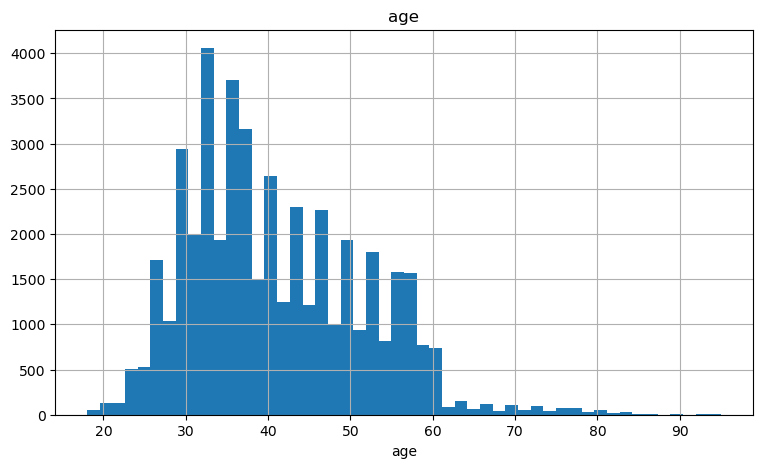

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
5%         -172.000000
10%           0.000000
20%          22.000000
30%         131.000000
40%         272.000000
50%         448.000000
60%         701.000000
70%        1126.000000
90%        3574.000000
95%        5768.000000
99%       13164.900000
max      102127.000000
Name: balance, dtype: float64


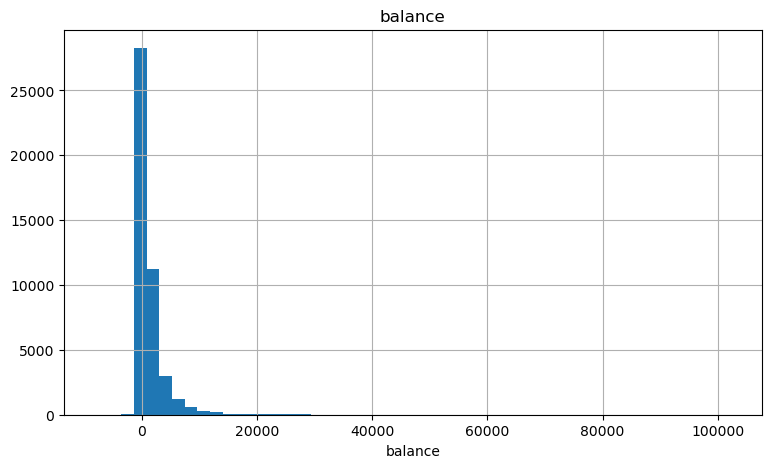

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
5%           3.000000
10%          5.000000
20%          7.000000
30%         10.000000
40%         13.000000
50%         16.000000
60%         18.000000
70%         20.000000
90%         28.000000
95%         29.000000
99%         31.000000
max         31.000000
Name: day, dtype: float64


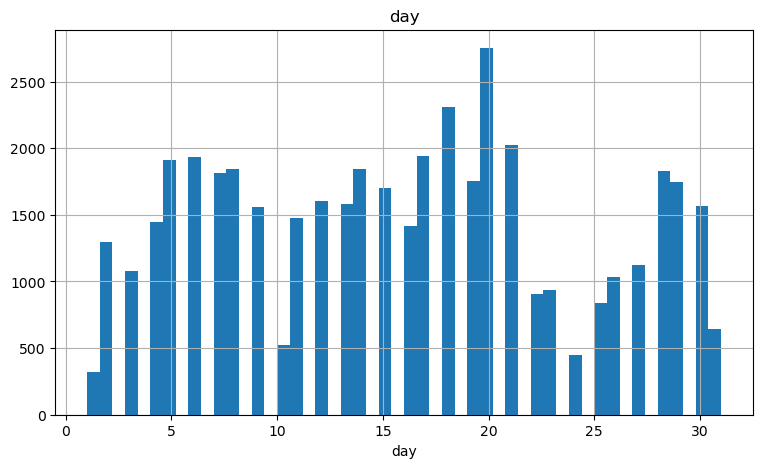

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
5%          35.000000
10%         58.000000
20%         89.000000
30%        117.000000
40%        147.000000
50%        180.000000
60%        223.000000
70%        280.000000
90%        548.000000
95%        751.000000
99%       1269.000000
max       4918.000000
Name: duration, dtype: float64


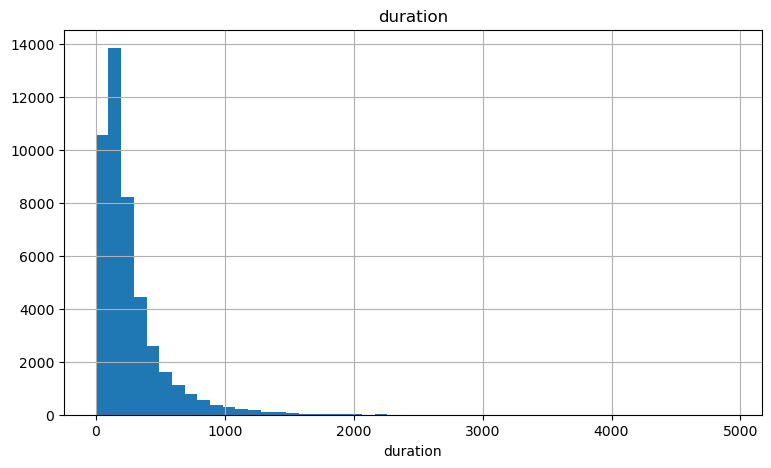

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          2.000000
50%          2.000000
60%          2.000000
70%          3.000000
90%          5.000000
95%          8.000000
99%         16.000000
max         63.000000
Name: campaign, dtype: float64


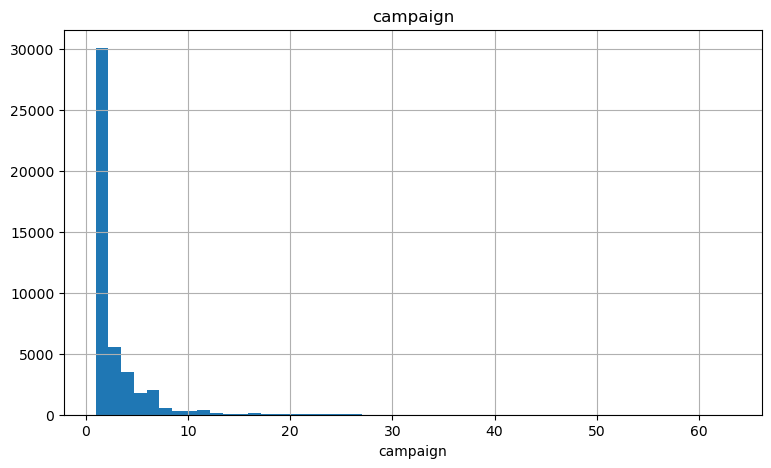

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
5%          -1.000000
10%         -1.000000
20%         -1.000000
30%         -1.000000
40%         -1.000000
50%         -1.000000
60%         -1.000000
70%         -1.000000
90%        185.000000
95%        317.000000
99%        370.000000
max        871.000000
Name: pdays, dtype: float64


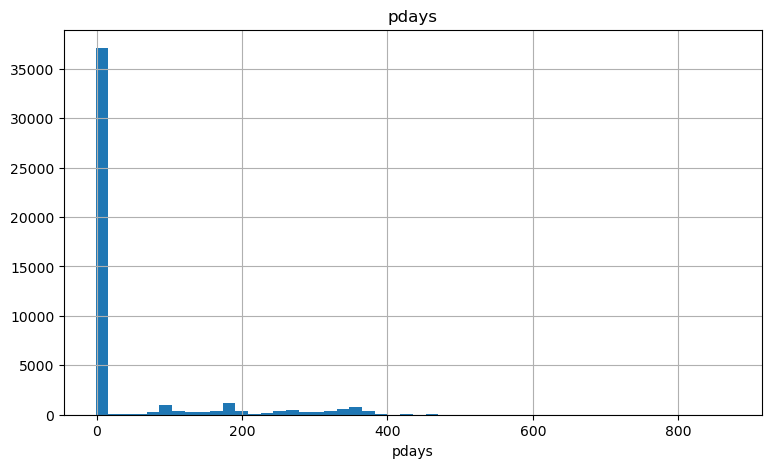

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
90%          2.000000
95%          3.000000
99%          8.900000
max        275.000000
Name: previous, dtype: float64


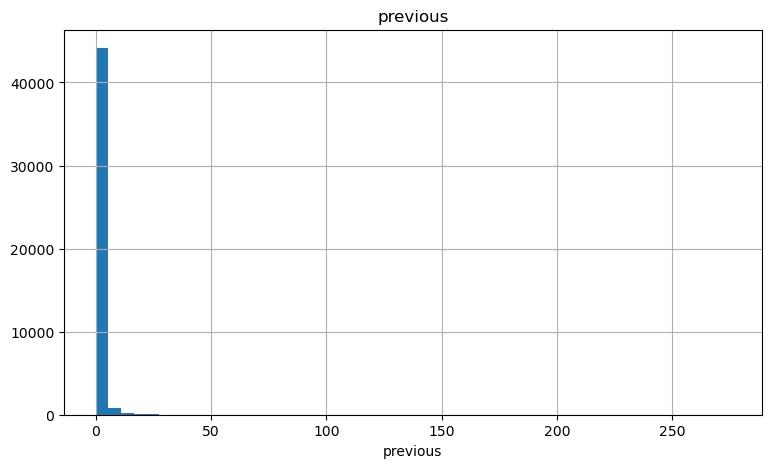

In [14]:
def num_smry(df, num_col, plot=False):
    """
    The function takes the dataset as input
    seperates the numerical variables and
    calculates the basic descriptive stats and quantiles of each numerical variable
    and creates histograms for each numeric variable
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.90, 0.95, 0.99]
    print(df[num_col].describe(quantiles).T)

    if plot:
        df[num_col].hist(bins=50, figsize=(9,5))
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show()

for col in num_cols:
    num_smry(data, col, True)

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


Text(0, 0.5, 'Count')

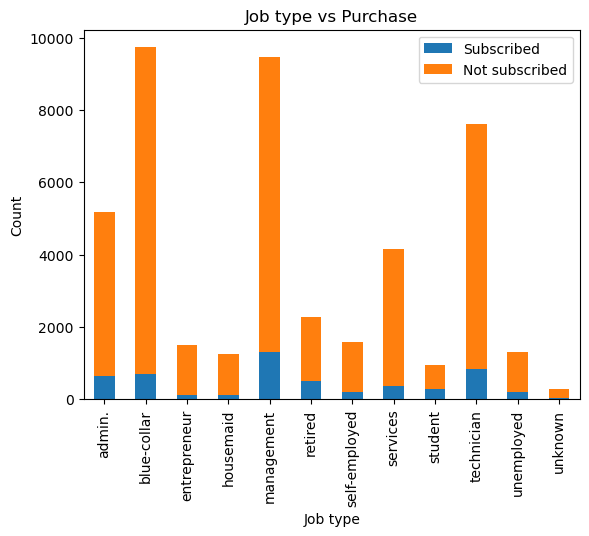

In [36]:
table = pd.crosstab(data.job,data.y)
print(table)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Job type vs Purchase')
plt.xlabel('Job type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

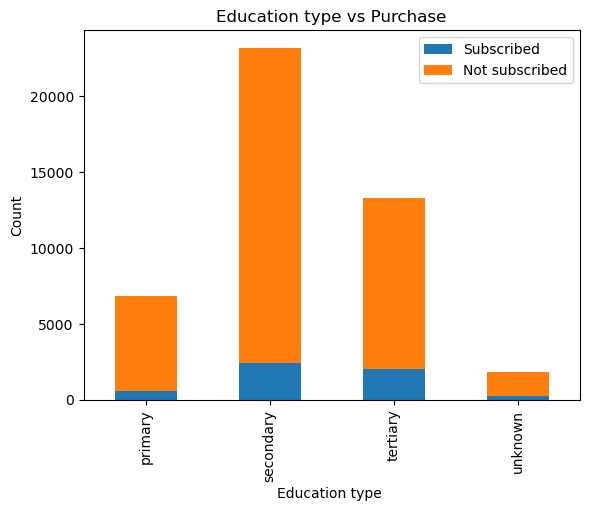

In [35]:
table = pd.crosstab(data.education,data.y)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Education type vs Purchase')
plt.xlabel('Education type ')
plt.ylabel('Count')

y         no  yes
month            
apr     2355  577
aug     5559  688
dec      114  100
feb     2208  441
jan     1261  142
jul     6268  627
jun     4795  546
mar      229  248
may    12841  925
nov     3567  403
oct      415  323
sep      310  269


Text(0, 0.5, 'Count')

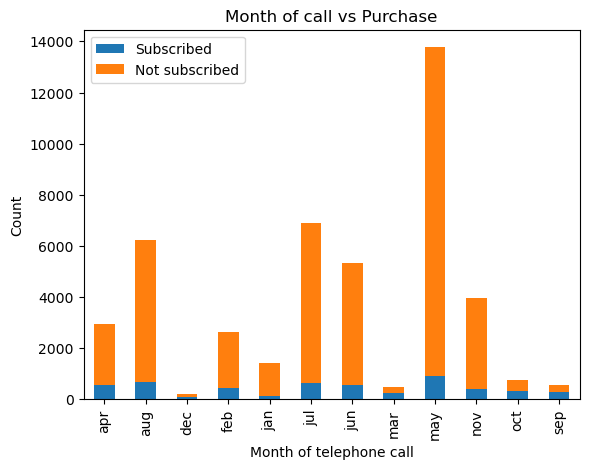

In [37]:

table = pd.crosstab(data.month,data.y)
print(table)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Month of call vs Purchase')
plt.xlabel('Month of telephone call')
plt.ylabel('Count')

In [14]:
data_model = data.drop(['duration'],axis=1)



In [15]:
data_model.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [16]:
data_model['target'] = np.where(data_model['y']=='no',0,1)


In [17]:
data_model.target.value_counts()

0    39922
1     5289
Name: target, dtype: int64

In [18]:
data_model = data_model.drop('y',axis=1)

In [19]:
data_model.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,0


In [20]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  target     45211 non-null  int32 
dtypes: int32(1), int64(6), object(9)
memory usage: 5.3+ MB


In [22]:
numeric_columns = data_model.select_dtypes(include=['float64', 'int64','int32']).columns.values
categorical_columns = data_model.select_dtypes(include=['object']).columns.values

In [23]:
print(numeric_columns)

['age' 'balance' 'day' 'campaign' 'pdays' 'previous' 'target']


In [24]:
print(categorical_columns)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


In [25]:
categorical_data = data_model[categorical_columns.tolist()]

In [26]:
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [27]:
numerical_data = data_model[numeric_columns.tolist()]

In [28]:
rated_dummies = pd.get_dummies(categorical_data)

In [29]:
rated_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [30]:
numerical_data.head()

,age,balance,day,campaign,pdays,previous,target
0,58,2143,5,1,-1,0,0
1,44,29,5,1,-1,0,0
2,33,2,5,1,-1,0,0
3,47,1506,5,1,-1,0,0
4,33,1,5,1,-1,0,0


In [31]:
final_one = pd.concat([numerical_data,rated_dummies], axis=1)

In [32]:
final_one.head()

,age,balance,day,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [54]:
# load X and y
X = final_one.drop(columns=['target'])
y = final_one['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=30)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (31647, 50)
Number transactions y_train dataset:  (31647,)
Number transactions X_test dataset:  (13564, 50)
Number transactions y_test dataset:  (13564,)


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [57]:
acc1 = accuracy_score(y_pred, y_test)
print(classification_report(y_pred, y_test))
print(acc1)

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     13427
           1       0.06      0.64      0.10       137

    accuracy                           0.89     13564
   macro avg       0.53      0.76      0.52     13564
weighted avg       0.99      0.89      0.93     13564

0.8887496313771749


In [58]:
import pandas as pd



confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted      0   1
Actual              
0          11968  50
1           1459  87


In [59]:
from sklearn.ensemble import RandomForestClassifier



In [60]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc5 = accuracy_score(pred2, y_test)
print(classification_report(pred2, y_test))
print(acc5)

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     12962
           1       0.23      0.59      0.33       602

    accuracy                           0.89     13564
   macro avg       0.60      0.75      0.64     13564
weighted avg       0.95      0.89      0.92     13564

0.8938366263639045


In [61]:
confusion_matrix = pd.crosstab(y_test, pred2, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted      0    1
Actual               
0          11770  248
1           1192  354


In [155]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [62]:

print('roc_auc_score is: ', roc_auc_score(y_test, pred2))

roc_auc_score is:  0.6041711473324726


In [63]:

print('roc_auc_score is: ', roc_auc_score(y_test, y_pred))

roc_auc_score is:  0.5260569150586324


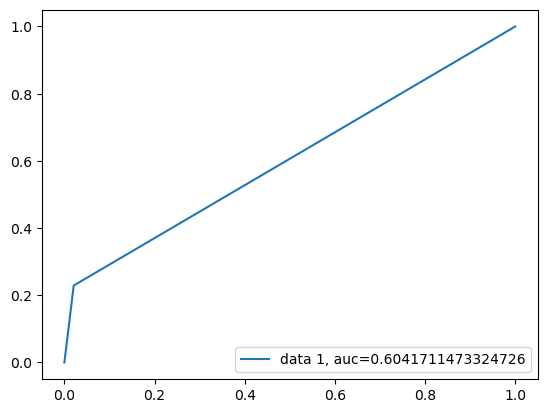

In [64]:
#random forest
fpr, tpr, _ = metrics.roc_curve(y_test,pred2)
auc = metrics.roc_auc_score(y_test,pred2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

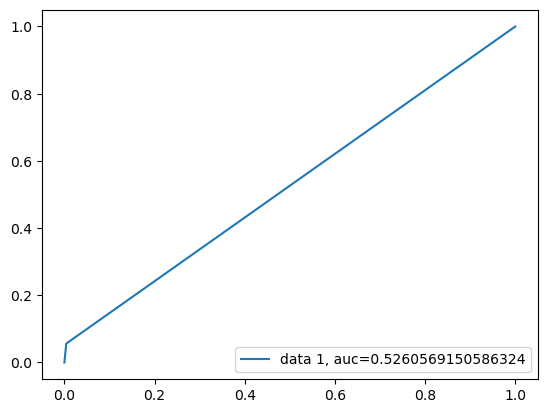

In [65]:
#logistic regression
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()